<a href="https://colab.research.google.com/github/cyeonh/POSCO_Big_Data_Project/blob/main/diagnosis_data_%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%B0%A8%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import matplotlib



In [3]:
df1 = pd.read_csv('Medical_Image_Data_01.csv', encoding='cp949')
df2 = pd.read_csv('Patient_Diagnosis_Data.csv')
df3 = pd.read_csv('Patient_Surgery_Data.csv')

In [4]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [5]:
df2.head()

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,입원일자,종양진행여부,직업,체중,퇴원일자,헤모글로빈수치,혈전합병증여부,환자통증정도,흡연여부,통증기간(월)
0,1PT,22.8,3,51.0,0.0,0,0,0,0,0,...,20190713,0,자영업,60.3,20190716,13.66,0,10,0,1.0
1,2PT,44.9,4,26.0,0.0,0,0,0,0,0,...,20190715,0,운동선수,71.7,20190716,13.73,0,10,0,1.0
2,3PT,53.0,3,NaN,0.0,0,0,1,0,0,...,20190729,0,특수전문직,77.1,20190801,15.34,0,7,0,1.0
3,4PT,54.7,4,18.0,0.0,0,1,0,0,0,...,20190731,0,주부,74.2,20190803,15.38,0,7,0,2.0
4,5PT,53.8,4,NaN,0.0,0,1,0,0,0,...,20190903,0,특수전문직,80.7,20190907,13.08,0,7,0,1.0


In [6]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   환자ID                    1894 non-null   object 
 1   Large Lymphocyte        1894 non-null   float64
 2   Location of herniation  1894 non-null   int64  
 3   ODI                     462 non-null    float64
 4   가족력                     1843 non-null   float64
 5   간질성폐질환                  1894 non-null   int64  
 6   고혈압여부                   1894 non-null   int64  
 7   과거수술횟수                  1894 non-null   int64  
 8   당뇨여부                    1894 non-null   int64  
 9   말초동맥질환여부                1894 non-null   int64  
 10  빈혈여부                    1894 non-null   int64  
 11  성별                      1894 non-null   int64  
 12  스테로이드치료                 1894 non-null   int64  
 13  신부전여부                   1894 non-null   int64  
 14  신장                      1894 non-null   

# 결측치 확인 및 처리

## 진단 데이터

In [7]:
# 결측치 확인
df2.isnull().sum()

환자ID                         0
Large Lymphocyte             0
Location of herniation       0
ODI                       1432
가족력                         51
간질성폐질환                       0
고혈압여부                        0
과거수술횟수                       0
당뇨여부                         0
말초동맥질환여부                     0
빈혈여부                         0
성별                           0
스테로이드치료                      0
신부전여부                        0
신장                           0
심혈관질환                        0
암발병여부                        0
연령                           0
우울증여부                        0
입원기간                         0
입원일자                         0
종양진행여부                       0
직업                         415
체중                           0
퇴원일자                         0
헤모글로빈수치                      1
혈전합병증여부                      0
환자통증정도                       0
흡연여부                         0
통증기간(월)                      4
dtype: int64

ODI 가족력, 직업, 헤모글로빈수치, 통증기간(월) 결측치 의심되는 값 위치

통증기간(월) 의 경우 결측치의 경우 통증기간이 없었다고 가정한다. 

결측치 값을 0으로 대체한다.

In [8]:
df2['통증기간(월)'].fillna(0, inplace = True)

헤모글로빈 수치의 경우 결측치가 1건 있다. 

헤모글로빈 수치는 수술을 할 때에 매우 중요한 수치이기 때문에 값을 대체할 경우 정보를 왜곡시킬 위험이 있다. 데이터의 수가 1800건 정도 있기 때문에 1건의 데이터를 삭제해도 영향이 크지 않을 것이다. 

결측치가 포함된 행을 삭제한다.


In [9]:
df2.dropna(subset=['헤모글로빈수치'], inplace = True)

직업의 경우 결측치가 총 415건으로 1800개 정도 되는 데이터에서 차지하는 비중이 크다. 결측치를 삭제하거나 최빈값으로 대체를 한다면 데이터를 왜곡시킬 위험이 있다. 

 따라서 결측치는 'other'로 대체하고 처리 방법은 나중에 고려하겠다.

In [10]:
df2['직업'].fillna('other', inplace = True)

ODI는 요통기능장애평가를 의미한다. 척추 질환 환자들에게 있어서 중요한 요소로 판단하여 제거하지 않고 대체한다. 

따라서 결측치는 'none'으로 대체한다. 

In [11]:
df2['ODI'].fillna('none', inplace = True)

가족력의 결측치의 경우 가족력이 없어서 작성하지 않은 것으로 판단한다. 

따라서 결측치는 0으로 대체한다. 

In [12]:
df2['가족력'].fillna('0', inplace = True)

# 이상치 여부 확인 및 처리

입원기간

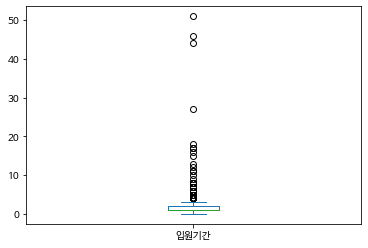

In [13]:
df2['입원기간'].plot.box()

입원기간의 이상치 값들을 살펴보자

In [14]:
df2['입원기간'].describe()

count    1893.000000
mean        1.736926
std         2.344643
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        51.000000
Name: 입원기간, dtype: float64

In [15]:
hospit = df2['입원기간'] > 2 + 1.5* (2.0-1.0)
df2[hospit][['입원기간', '연령']].sort_values(by = '입원기간', ascending=False)

,입원기간,연령
1859,51,36
1431,46,57
1371,44,30
1382,27,82
1577,18,71
...,...,...
974,4,56
1445,4,41
1446,4,45
1526,4,64


입원기간 이상치로 예측되는 값을 살펴보니, 최장 입원 환자의 입원 기간은 51개월이고 연령은 36세이다. 나머지 이상치 예측값들도 기한은 길지만, 연령이 높은 편이기에 장기입원 환자라고 볼 수 있다. 

따라서 입원기간 데이터에는 이상치가 없다. 

입원일자

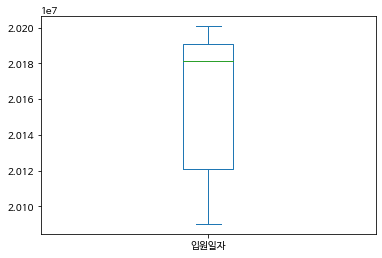

In [16]:
df2['입원일자'].plot.box()

헤모글로빈수치

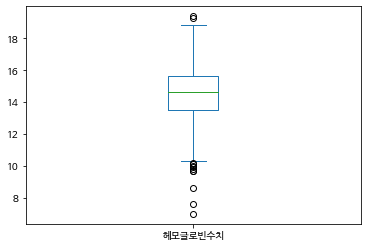

In [17]:
df2['헤모글로빈수치'].plot.box()

건강한 헤모글로빈 수치는 12~18 사이에 위치한다. 하지만 이것보다 낮거나 높은 값도 있을 수 있다. 헤모글로빈 수치가 0 이거나 0보다 작은 값이 있는지만 확인한다. 


In [18]:
df2[df2['헤모글로빈수치']<=0]

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,입원일자,종양진행여부,직업,체중,퇴원일자,헤모글로빈수치,혈전합병증여부,환자통증정도,흡연여부,통증기간(월)


헤모글로빈 수치가 정상 범위를 벗어난 경우는 있지만, 이상치로 볼만한 데이터는 없다. 

환자통증정도

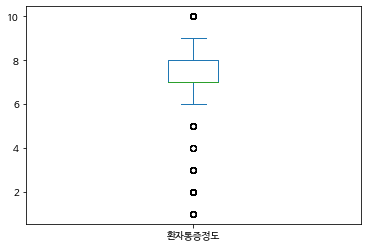

In [19]:
df2['환자통증정도'].plot.box()

환자 통증 정도는 1~10 점으로 나뉘는 환자의 주관적 척도이다. 이상치가 의심되는 점들을 보면 1 과 10 사이에 들어오는 값들이다. 

따라서 환자통증 정도에는 이상치가 없다

통증기간

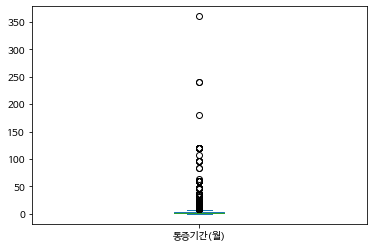

In [20]:
df2['통증기간(월)'].plot.box()

In [21]:
df2[df2['통증기간(월)'] > 120]['연령']

1326    46
1480    61
1618    68
1808    55
Name: 연령, dtype: int64

환자 통증기간의 이상치 확인을 위해 10년 이상 통증을 느낀 환자들의 연령을 확인 해봤다. 연령을 확인하니 환자들의 나이는 최소 46, 최대 68로 10년 이상 통증을 지녀 왔다고 이해가 가능한 나이이다.

따라서 통증기간(월)은 이상치가 없다.

퇴원일자

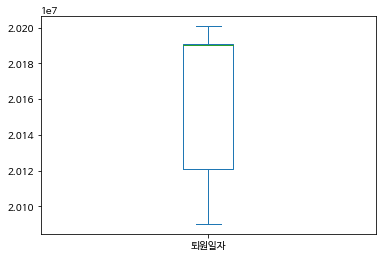

In [22]:
df2['퇴원일자'].plot.box()

퇴원일자는 이상치가 없다.

체중

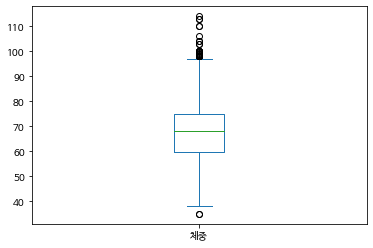

In [23]:
df2['체중'].plot.box()

In [24]:
df2[df2['체중']>100][['신장','체중']]

,신장,체중
853,185,110.0
929,181,113.0
942,183,104.0
994,177,103.0
1246,191,114.0
1409,176,106.0
1579,204,103.0
1638,185,110.0
1840,181,113.0
1866,183,104.0


In [25]:
df2[df2['체중']<40][['신장','체중']]

,신장,체중
896,140,35.0
1166,162,38.0
1763,140,35.0


이상치로 의심되는 100kg 이상의 환자들과 40kg 이하 환자들의 신장을 살펴보았다. 신장 대비로 봤을때 몸무게가 모두 있을법 하다. 

따라서 체중에는 이상치가 없다.

우울증 여부

In [26]:
df2['우울증여부'].unique()

array([0, 1, 2])

In [27]:
df2[df2['우울증여부'] == 2]

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,입원일자,종양진행여부,직업,체중,퇴원일자,헤모글로빈수치,혈전합병증여부,환자통증정도,흡연여부,통증기간(월)
646,647PT,53.1,2,none,0.0,0,0,0,0,0,...,20200629,0,사업가,66.0,20200630,14.74,0,2,0,1.0


In [28]:
df2 = df2[df2['우울증여부'] != 2]

우울증 여부는 있으면 1, 없으면 0으로 나타냈다. 데이터 중 2라고 입력된 값은 입력 오류로 보인다. 

따라서 우울증 여부의 이상치를 삭제해준다. 

흡연여부, 혈전합병증여부, 종양진행여부

In [29]:
df2['흡연여부'].unique()

array([0, 1])

In [30]:
df2['혈전합병증여부'].unique()

array([0, 1])

In [31]:
df2['종양진행여부'].unique()

array([0, 1])

흡연여부, 혈전 합병증 여부, 종양 진행 여부 모두 0과 1로 구성되어 이상치가 없다. 


Large Lymphocyte 대림프구

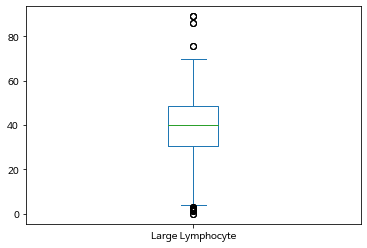

In [32]:
df2['Large Lymphocyte'].plot.box()

In [33]:
df2['Large Lymphocyte'].describe()

count    1892.000000
mean       39.282611
std        13.653951
min         0.000000
25%        30.700000
50%        40.200000
75%        48.600000
max        89.000000
Name: Large Lymphocyte, dtype: float64

In [34]:
df2[df2['Large Lymphocyte']> (48.6 + 1.5 * (48.6-30.7))][['Large Lymphocyte']]

,Large Lymphocyte
8,89.0
54,86.1
63,75.7
478,89.0
524,86.1
533,75.7
948,89.0
972,89.0
1065,86.1
1078,75.7


In [35]:
df2[df2['Large Lymphocyte']< (30.7 - 1.5 * (48.6-30.7))][['Large Lymphocyte']]

,Large Lymphocyte
151,1.9
188,3.0
206,1.8
246,2.1
312,1.4
446,0.0
621,1.9
658,3.0
676,1.8
716,2.1


In [36]:
df2 = df2[df2['Large Lymphocyte']!=0]

대리림프구의 크기가 0인 경우는 존재할 수 없으므로 이상치로 판단하여 삭제한다. 

디스크 탈출 위치

In [37]:
df2['Location of herniation'].unique()

array([3, 4, 2, 5, 1])

디스크 탈출 위치 이상치 없음